Refactored

In [4]:
import pandas as pd
import pandas_ta as ta
from tqdm import tqdm
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from backtesting import Strategy
from backtesting import Backtest
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

ema_length = 200
tqdm.pandas()

tradingData = pd.read_csv("../data/^ixic-1y-1h.csv")
tradingData.Datetime = pd.to_datetime(tradingData.Datetime, utc=True)
tradingData=tradingData[tradingData.High != tradingData.Low]
tradingData.set_index('Datetime', inplace=True)
tradingData.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
tradingData

Open          High           Low  \
Datetime                                                              
2023-04-20 13:30:00+00:00  12039.096680  12122.727539  12039.096680   
2023-04-20 14:30:00+00:00  12112.754883  12130.212891  12077.960938   
2023-04-20 15:30:00+00:00  12094.689453  12114.124023  12081.461914   
2023-04-20 16:30:00+00:00  12112.006836  12155.889648  12109.030273   
2023-04-20 17:30:00+00:00  12152.539062  12155.239258  12082.914062   
...                                 ...           ...           ...   
2024-04-19 15:30:00+00:00  15431.418945  15446.855469  15313.109375   
2024-04-19 16:30:00+00:00  15312.722656  15401.906250  15312.081055   
2024-04-19 17:30:00+00:00  15362.106445  15425.594727  15311.298828   
2024-04-19 18:30:00+00:00  15308.803711  15323.899414  15235.889648   
2024-04-19 19:30:00+00:00  15280.984375  15291.751953  15223.747070   

                                  Close  
Datetime                                 
2023-04-20 13:30:00+00:00  12110.858398  
2023-04-20 14:30:00+00:00  12094.939453  
2023-04-20 15:30:00+00:00  12112.148438  
2023-04-20 16:30:00+00:00  12151.598633  
2023-04-20 17:30:00+00:00  12083.585938  
...                                 ...  
2024-04-19 15:30:00+00:00  15313.916992  
2024-04-19 16:30:00+00:00  15361.449219  
2024-04-19 17:30:00+00:00  15311.298828  
2024-04-19 18:30:00+00:00  15282.343750  
2024-04-19 19:30:00+00:00  15282.009766  

[1756 rows x 4 columns]

In [5]:
tradingData['EMA'] = ta.ema(tradingData.Close, length=ema_length)
macd = ta.macd(tradingData.Close)
macd

tradingData['MACD'] = macd.loc[:, 'MACD_12_26_9']
tradingData['MACD_signal'] = macd.loc[:, 'MACDs_12_26_9']
tradingData['MACD_histogram'] = macd.loc[:, 'MACDh_12_26_9']
tradingData['ATR'] = ta.atr(tradingData.High, tradingData.Low, tradingData.Close, length=7)
tradingData

Open          High           Low  \
Datetime                                                              
2023-04-20 13:30:00+00:00  12039.096680  12122.727539  12039.096680   
2023-04-20 14:30:00+00:00  12112.754883  12130.212891  12077.960938   
2023-04-20 15:30:00+00:00  12094.689453  12114.124023  12081.461914   
2023-04-20 16:30:00+00:00  12112.006836  12155.889648  12109.030273   
2023-04-20 17:30:00+00:00  12152.539062  12155.239258  12082.914062   
...                                 ...           ...           ...   
2024-04-19 15:30:00+00:00  15431.418945  15446.855469  15313.109375   
2024-04-19 16:30:00+00:00  15312.722656  15401.906250  15312.081055   
2024-04-19 17:30:00+00:00  15362.106445  15425.594727  15311.298828   
2024-04-19 18:30:00+00:00  15308.803711  15323.899414  15235.889648   
2024-04-19 19:30:00+00:00  15280.984375  15291.751953  15223.747070   

                                  Close           EMA        MACD  \
Datetime                                                            
2023-04-20 13:30:00+00:00  12110.858398           NaN         NaN   
2023-04-20 14:30:00+00:00  12094.939453           NaN         NaN   
2023-04-20 15:30:00+00:00  12112.148438           NaN         NaN   
2023-04-20 16:30:00+00:00  12151.598633           NaN         NaN   
2023-04-20 17:30:00+00:00  12083.585938           NaN         NaN   
...                                 ...           ...         ...   
2024-04-19 15:30:00+00:00  15313.916992  16074.663805 -146.358802   
2024-04-19 16:30:00+00:00  15361.449219  16067.567142 -152.629630   
2024-04-19 17:30:00+00:00  15311.298828  16060.042084 -159.803904   
2024-04-19 18:30:00+00:00  15282.343750  16052.303792 -165.913453   
2024-04-19 19:30:00+00:00  15282.009766  16044.639175 -168.836028   

                           MACD_signal  MACD_histogram        ATR  
Datetime                                                           
2023-04-20 13:30:00+00:00          NaN             NaN        NaN  
2023-04-20 14:30:00+00:00          NaN             NaN        NaN  
2023-04-20 15:30:00+00:00          NaN             NaN        NaN  
2023-04-20 16:30:00+00:00          NaN             NaN        NaN  
2023-04-20 17:30:00+00:00          NaN             NaN        NaN  
...                                ...             ...        ...  
2024-04-19 15:30:00+00:00  -121.116970      -25.241832  94.587639  
2024-04-19 16:30:00+00:00  -127.419502      -25.210128  93.907290  
2024-04-19 17:30:00+00:00  -133.896383      -25.907521  96.819949  
2024-04-19 18:30:00+00:00  -140.299797      -25.613656  95.561351  
2024-04-19 19:30:00+00:00  -146.007043      -22.828985  91.624713  

[1756 rows x 9 columns]

In [6]:
def ema_signal(df, current, go_back_number):
  df_slice = df.copy()
  start = max(0, current - go_back_number)
  end = current
  relevant_rows = df_slice.iloc[start:end]

  if all(relevant_rows['High'] < relevant_rows['EMA']):
    return -1
  elif all(relevant_rows['Low'] > relevant_rows['EMA']):
    return 1
  else:
    return 0

tradingData.reset_index(inplace=True)
tradingData['EMA_signal'] = tradingData.progress_apply(
  lambda row: ema_signal(tradingData, row.name, 5), axis='columns')
tradingData

  0%|          | 0/1756 [00:00<?, ?it/s]

100%|██████████| 1756/1756 [00:00<00:00, 5849.70it/s]


Datetime          Open          High           Low  \
0    2023-04-20 13:30:00+00:00  12039.096680  12122.727539  12039.096680   
1    2023-04-20 14:30:00+00:00  12112.754883  12130.212891  12077.960938   
2    2023-04-20 15:30:00+00:00  12094.689453  12114.124023  12081.461914   
3    2023-04-20 16:30:00+00:00  12112.006836  12155.889648  12109.030273   
4    2023-04-20 17:30:00+00:00  12152.539062  12155.239258  12082.914062   
...                        ...           ...           ...           ...   
1751 2024-04-19 15:30:00+00:00  15431.418945  15446.855469  15313.109375   
1752 2024-04-19 16:30:00+00:00  15312.722656  15401.906250  15312.081055   
1753 2024-04-19 17:30:00+00:00  15362.106445  15425.594727  15311.298828   
1754 2024-04-19 18:30:00+00:00  15308.803711  15323.899414  15235.889648   
1755 2024-04-19 19:30:00+00:00  15280.984375  15291.751953  15223.747070   

             Close           EMA        MACD  MACD_signal  MACD_histogram  \
0     12110.858398           NaN         NaN          NaN             NaN   
1     12094.939453           NaN         NaN          NaN             NaN   
2     12112.148438           NaN         NaN          NaN             NaN   
3     12151.598633           NaN         NaN          NaN             NaN   
4     12083.585938           NaN         NaN          NaN             NaN   
...            ...           ...         ...          ...             ...   
1751  15313.916992  16074.663805 -146.358802  -121.116970      -25.241832   
1752  15361.449219  16067.567142 -152.629630  -127.419502      -25.210128   
1753  15311.298828  16060.042084 -159.803904  -133.896383      -25.907521   
1754  15282.343750  16052.303792 -165.913453  -140.299797      -25.613656   
1755  15282.009766  16044.639175 -168.836028  -146.007043      -22.828985   

            ATR  EMA_signal  
0           NaN          -1  
1           NaN           0  
2           NaN           0  
3           NaN           0  
4           NaN           0  
...         ...         ...  
1751  94.587639          -1  
1752  93.907290          -1  
1753  96.819949          -1  
1754  95.561351          -1  
1755  91.624713          -1  

[1756 rows x 11 columns]

In [7]:
def macd_signal(data, current):
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] < data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] >
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return 1
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] > data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] <
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return -1
    return 0

In [8]:
def total_signal(df, current, go_back_number):
    if (all(df.loc[current - go_back_number: current, 'EMA_signal'] == 1) and
        all(df.loc[current - 3:current - 2, 'MACD'] < df.loc[current - 3:current - 2, 'MACD_signal']) and
        all(df.loc[current - 1:current, 'MACD'] > df.loc[current - 1:current, 'MACD_signal'])
        ):
            return 1
    if (all(df.loc[current - go_back_number: current, 'EMA_signal'] == -1) and
        all(df.loc[current - 3:current - 2, 'MACD'] > df.loc[current - 3:current - 2, 'MACD_signal']) and
        all(df.loc[current - 1:current, 'MACD'] < df.loc[current - 1:current, 'MACD_signal'])
        ):

            return -1
    return 0

tradingData['TotalSignal'] = tradingData.progress_apply(
       lambda row: total_signal(tradingData, row.name, 7), axis='columns')
tradingData

100%|██████████| 1756/1756 [00:00<00:00, 6901.91it/s]


Datetime          Open          High           Low  \
0    2023-04-20 13:30:00+00:00  12039.096680  12122.727539  12039.096680   
1    2023-04-20 14:30:00+00:00  12112.754883  12130.212891  12077.960938   
2    2023-04-20 15:30:00+00:00  12094.689453  12114.124023  12081.461914   
3    2023-04-20 16:30:00+00:00  12112.006836  12155.889648  12109.030273   
4    2023-04-20 17:30:00+00:00  12152.539062  12155.239258  12082.914062   
...                        ...           ...           ...           ...   
1751 2024-04-19 15:30:00+00:00  15431.418945  15446.855469  15313.109375   
1752 2024-04-19 16:30:00+00:00  15312.722656  15401.906250  15312.081055   
1753 2024-04-19 17:30:00+00:00  15362.106445  15425.594727  15311.298828   
1754 2024-04-19 18:30:00+00:00  15308.803711  15323.899414  15235.889648   
1755 2024-04-19 19:30:00+00:00  15280.984375  15291.751953  15223.747070   

             Close           EMA        MACD  MACD_signal  MACD_histogram  \
0     12110.858398           NaN         NaN          NaN             NaN   
1     12094.939453           NaN         NaN          NaN             NaN   
2     12112.148438           NaN         NaN          NaN             NaN   
3     12151.598633           NaN         NaN          NaN             NaN   
4     12083.585938           NaN         NaN          NaN             NaN   
...            ...           ...         ...          ...             ...   
1751  15313.916992  16074.663805 -146.358802  -121.116970      -25.241832   
1752  15361.449219  16067.567142 -152.629630  -127.419502      -25.210128   
1753  15311.298828  16060.042084 -159.803904  -133.896383      -25.907521   
1754  15282.343750  16052.303792 -165.913453  -140.299797      -25.613656   
1755  15282.009766  16044.639175 -168.836028  -146.007043      -22.828985   

            ATR  EMA_signal  TotalSignal  
0           NaN          -1            0  
1           NaN           0            0  
2           NaN           0            0  
3           NaN           0            0  
4           NaN           0            0  
...         ...         ...          ...  
1751  94.587639          -1            0  
1752  93.907290          -1            0  
1753  96.819949          -1            0  
1754  95.561351          -1            0  
1755  91.624713          -1            0  

[1756 rows x 12 columns]

In [9]:
def pointpos(x):
    if x['TotalSignal'] == 1:
        return x['Low']-1e-3
    elif x['TotalSignal'] == -1:
        return x['High']+1e-3
    else:
        return np.nan

tradingData['pointpos'] = tradingData.apply(lambda row: pointpos(row), axis='columns')

In [10]:
fig = go.Figure(data=[go.Candlestick(x=tradingData.index,
                open=tradingData['Open'],
                high=tradingData['High'],
                low=tradingData['Low'],
                close=tradingData['Close'])])

fig.add_scatter(x=tradingData.index, y=tradingData['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="entry")

# fig.show(renderer="browser")
fig.show()

In [11]:
class MyStrat(Strategy):
    mysize = 3
    slcoef = 1.1
    TPSLRatio = 1.5
    #rsi_length = 16

    def init(self):
        super().init()
        self.signal1 = self.I(lambda: tradingData.TotalSignal)
        #df['RSI']=ta.rsi(df.Close, length=self.rsi_length)

    def next(self):
        super().next()
        slatr = self.slcoef * self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        # if len(self.trades)>0:
        #     if self.trades[-1].is_long and self.data.RSI[-1]>=90:
        #         self.trades[-1].close()
        #     elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
        #         self.trades[-1].close()

        if self.signal1 == 1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr * TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1 == -1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

print(tradingData[tradingData.TotalSignal != 0].count())

bt = Backtest(tradingData, MyStrat, cash=25000, margin=1/30, commission=0.00)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 26)],
                    TPSLRatio=[i/10 for i in range(10, 26)],
                    #rsi_length=[5, 8, 10, 12, 14, 16],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

Datetime          39
Open              39
High              39
Low               39
Close             39
EMA               39
MACD              39
MACD_signal       39
MACD_histogram    39
ATR               39
EMA_signal        39
TotalSignal       39
pointpos          39
dtype: int64


/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_63541/2907752432.py:35: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning:

For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.



  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                    1755.0
Duration                               1755.0
Exposure Time [%]                   31.833713
Equity Final [$]                 29964.716775
Equity Peak [$]                  30029.583053
Return [%]                          19.858867
Buy & Hold Return [%]               26.184365
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -7.742548
Avg. Drawdown [%]                   -1.402215
Max. Drawdown Duration                  562.0
Avg. Drawdown Duration              46.965517
# Trades                                 30.0
Win Rate [%]                             40.0
Best Trade [%]                       2.852886
Worst Trade [%]                     -1.586542
Avg. Trade [%]                    

In [42]:
stats["_strategy"]
trade_log = stats["_trades"]
trade_log

Size  EntryBar  ExitBar    EntryPrice     ExitPrice         PnL  \
0      3       217      220  14276.063477  14170.840820 -315.667969   
1      3       229      248  14219.260742  14369.504099  450.730071   
2      3       260      267  14428.028320  14526.244459  294.648415   
3      3       321      339  15005.351562  15145.951172  421.798828   
4      3       341      347  15120.338867  15069.098029 -153.722514   
5      3       433      438  14981.167969  15152.607494  514.318575   
6      3       460      463  15569.273438  15486.885447 -247.163971   
7      3       486      487  15607.348633  15568.468917 -116.639147   
8      3       507      508  15404.483398  15525.429922  362.839571   
9      3       530      542  15722.115234  15868.939035  440.471402   
10     3       571      584  15825.860352  15684.290039 -424.710938   
11     3       640      642  16117.473633  16213.117161  286.930584   
12     3       666      669  16064.772461  16241.528666  530.268614   
13     3       670      675  16237.709961  16434.256542  589.639744   
14     3       692      708  16189.819336  16074.114702 -347.113903   
15     3       719      724  16192.319336  16028.371094 -491.844727   
16     3       729      736  16160.485352  16320.172609  479.061772   
17     3       777      780  16372.086914  16474.671301  307.753161   
18     3       797      803  16319.100586  16454.665341  406.694265   
19     3       817      823  16294.114258  16197.059299 -291.164877   

    ReturnPct  EntryTime  ExitTime  Duration  
0   -0.007371        217       220         3  
1    0.010566        229       248        19  
2    0.006807        260       267         7  
3    0.009370        321       339        18  
4   -0.003389        341       347         6  
5    0.011444        433       438         5  
6   -0.005292        460       463         3  
7   -0.002491        486       487         1  
8    0.007851        507       508         1  
9    0.009339        530       542        12  
10  -0.008946        571       584        13  
11   0.005934        640       642         2  
12   0.011003        666       669         3  
13   0.012104        670       675         5  
14  -0.007147        692       708        16  
15  -0.010125        719       724         5  
16   0.009881        729       736         7  
17   0.006266        777       780         3  
18   0.008307        797       803         6  
19  -0.005956        817       823         6

In [36]:
bt.plot()

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1283', ...)

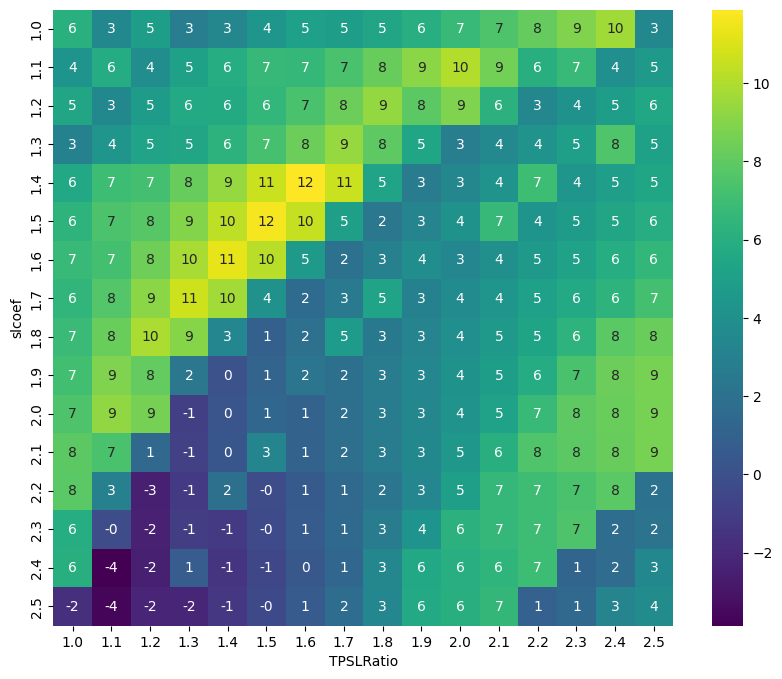

In [30]:
# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()